In [1]:
# !pip3 install tensorflow==2.17

In [2]:
# !7z x "/content/Tables (Data set).zip"

In [3]:
# from google.colab import drive
# drive.mount(r'/content/drive')

In [4]:
# cd "drive/My Drive/ML"

In [5]:
!pip install tensorflow[and-cuda]

In [6]:

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random


2025-04-30 02:14:41.489962: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 02:14:41.575847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746004481.615060 2516602 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746004481.626937 2516602 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746004481.696800 2516602 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
!nvidia-smi

Wed Apr 30 02:14:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|


|   0  NVIDIA A100-PCIE-40GB          On  |   00000000:E3:00.0 Off |                    0 |
| N/A   31C    P0             42W /  250W |       4MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+------------------------+----------------------+
                                                                                         
+-----------------------------------------------------------------------------------------+
| Processes:                                                                              |
|  GPU   GI   CI              PID   Type   Process name                        GPU Memory |
|        ID   ID                                                               Usage      |
|=========================================================================================|
|  No running processes found                                                     

# 1.0 Data Analytics of the Granular Flow Data set
    Data Analytics prepares the data set for effective machine learning of the data

In [9]:
# import os


# granular_flow_data_paths=[]

# tot=np.arange(10000,100100,100)
# for i in tot:
#     a=[f"/content/Tables (Data set)/XYZ_Internal_Table_table_{i}.csv"]
#     granular_flow_data_paths+=a


# # os.chdir(r"C:\Users\c2305798\OneDrive - Teesside University\Documents\Dissertation\ML -Using New dataset")
# # print(os.getcwd())

# # os.listdir()

# granular_flow_dataset = []
# for datapath in granular_flow_data_paths:
# #     print(datapath)
#     df=pd.read_csv(datapath)
#     granular_flow_dataset.append(df)


In [10]:
import sys
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print('TF version:', tf.__version__)

# version_fn = getattr(tf.keras, "version", None)
# if version_fn and version_fn().startswith("3."):
#   import tf_keras as keras
# else:
#   keras = tf.keras



import subprocess

try:
    subprocess.check_output('nvidia-smi')
    print('Nvidia GPU detected!')
except Exception: # this command not being found can raise quite a few different errors depending on the configuration
    print('No Nvidia GPU in system!')




print('GPU', 'available (YES!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')



len(tf.config.experimental.list_physical_devices('GPU'))

TF version: 2.19.0


Nvidia GPU detected!
GPU available (YES!!!!!)


1

In [11]:
# y=pd.concat(granular_flow_dataset)
# Combined_flow_data=y.to_csv('./Combined flow data(#30).csv')
# Combined_flow_data

In [12]:

Granular_flow_data= pd.read_csv('/scratch/da2623/Gflow/Combined flow data(#30).csv')
Granular_flow_data= Granular_flow_data.drop(['Volume Fraction of Phase 1','Report: Sum KE (J)', 
                                              'Report: Sum WallStress (Pa)', 'X (m)',	'Y (m)',	'Z (m)', 
                                              'Parcel Centroid[Y] (m)', 'Particle Velocity[j] (m/s)'], axis='columns')
Granular_flow_data = Granular_flow_data[:120000]
Granular_flow_data

,Unnamed: 0,Time (s),Parcel Centroid[X] (m),Particle Velocity: Magnitude (m/s),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0,10.0,0.031825,0.603468,0.000501,0.603379,0.010375
1,1,10.0,0.027128,0.484547,0.000499,0.484467,0.008608
2,2,10.0,0.027052,0.603346,0.000642,0.602915,0.022796
3,3,10.0,0.023665,0.565108,0.000511,0.565076,0.005253
4,4,10.0,0.030634,0.590112,0.000500,0.578862,-0.001059
...,...,...,...,...,...,...,...
119995,19559,10.3,-0.056400,0.829171,0.009462,0.829166,0.002712
119996,19560,10.3,-0.072839,0.644130,0.002342,0.643805,-0.018221
119997,19561,10.3,-0.053951,0.833810,0.010652,0.832540,-0.027269
119998,19562,10.3,-0.060305,0.759387,0.008204,0.759212,-0.014192


In [13]:
# Granular_flow_data = Granular_flow_data[['Time (s)', 'Particle Velocity[i] (m/s)', 'Particle Velocity[k] (m/s)','Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']]
# Granular_flow_data= Granular_flow_data

## 1.1 Non-Dimensioning the Granular_flow_data set before Splitting

In [14]:

# Note: Though the diameter of the particles ia 1mm, the scaling used for l is
# 0.03m so as to align with DEM scaling (check Cui et. al 2024)

# Define characteristic scales
characteristic_time = 0.055  # l/g
characteristic_velocity = 0.54
characteristic_position = 0.03  # Example: Assume container dimension is 0.1 meters
characteristic_acceleration = characteristic_position / (characteristic_time**2)  # Assuming constant acceleration
characteristic_ParticleID = np.max(Granular_flow_data['Unnamed: 0'])

# Non-dimensionalize the data
Granular_flow_data['Unnamed: 0'] /= characteristic_ParticleID
Granular_flow_data['Time (s)'] /= characteristic_time

Granular_flow_data['Particle Velocity[i] (m/s)'] /= characteristic_velocity
# Granular_flow_data['Particle Velocity[j] (m/s)'] /= characteristic_velocity
Granular_flow_data['Particle Velocity[k] (m/s)'] /= characteristic_velocity

Granular_flow_data['Parcel Centroid[X] (m)'] /= characteristic_position
# Granular_flow_data['Parcel Centroid[Y] (m)'] /= characteristic_position
Granular_flow_data['Parcel Centroid[Z] (m)'] /= characteristic_position


## 1.2 Splitting of the Data into X and y

In [15]:
X= Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)'], axis=1)
y = Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']]

In [16]:
X.head()

,Unnamed: 0,Time (s),Particle Velocity: Magnitude (m/s),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0.000000,181.818182,0.603468,1.117369,0.019213
1,0.000030,181.818182,0.484547,0.897162,0.015940
2,0.000060,181.818182,0.603346,1.116509,0.042214
3,0.000090,181.818182,0.565108,1.046437,0.009727
4,0.000119,181.818182,0.590112,1.071967,-0.001961


In [17]:
y.head()

,Parcel Centroid[X] (m),Parcel Centroid[Z] (m)
0,1.060845,0.016716
1,0.904278,0.016625
2,0.901733,0.021391
3,0.788850,0.017034
4,1.021118,0.016677


##1.3 Further splitting of X and y into their respective training and testing data set (Using Sklearn train_test_split)

In [18]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp, test_size= 0.5, random_state=42)


CPU times: user 38.2 ms, sys: 9.25 ms, total: 47.4 ms
Wall time: 64.5 ms


In [19]:
X_train.shape, y_train.shape

((84000, 5), (84000, 2))

In [20]:
X_test.shape, y_test.shape

((18000, 5), (18000, 2))

In [21]:
# sns.histplot(y_train['Parcel Centroid[Z] (m)'], kde=True)

\# Scaling the training and testing data using Tanh Estimator (scales data in the range of -1 and +1) -->

(Modified) Tanh Estimator
Tanh estimators are considered to be more efficient and robust normalization technique. It is not sensitive to outliers and it also converges faster than Z-score normalization. It yields values between -1 and 1


$$X_{i} = 0.5*tanh \displaystyle \Bigg [ 0.01 * \frac{x_{i} - mean(X_{i})}{std(X_{i})}\displaystyle \Bigg] $$



## 1.4 Splitting and Scaling (Using Standard Scalar)

1.   $x\text{_}train$ and $x\text{_}test$ are just scaled, no further splitting

2.   $y\text{_}train$  and  $y\text{_}test$ are each splitted into their respective $i, j, \text{and } k$ components and then scaled



In [22]:
from sklearn.preprocessing import StandardScaler

scalarX = StandardScaler()
scalarY= StandardScaler()

scalarYi = StandardScaler()
scalarYj = StandardScaler()
scalarYk = StandardScaler()

#---------------------------------------------------------------
X_train_scaled = scalarX.fit_transform(X_train)
X_test_scaled = scalarX.transform(X_test)
X_val_scaled = scalarX.transform(X_val)

y_train_scaled = scalarY.fit_transform(y_train)
y_test_scaled = scalarY.transform(y_test)
y_val_scaled = scalarY.transform(y_val)

#---------------------------------------------------------------
#Scaling the train and test data of the target variable

yI_train_scaled = scalarYi.fit_transform(y_train['Parcel Centroid[X] (m)'].to_numpy().reshape(-1, 1))
yI_test_scaled = scalarYi.transform(y_test['Parcel Centroid[X] (m)'].to_numpy().reshape(-1, 1))


# yJ_train_scaled = scalarYj.fit_transform(y_train['Parcel Centroid[Y] (m)'].to_numpy().reshape(-1, 1))
# yJ_test_scaled = scalarYj.transform(y_test['Parcel Centroid[Y] (m)'].to_numpy().reshape(-1, 1))


yK_train_scaled = scalarYk.fit_transform(y_train['Parcel Centroid[Z] (m)'].to_numpy().reshape(-1, 1))
yK_test_scaled = scalarYk.transform(y_test['Parcel Centroid[Z] (m)'].to_numpy().reshape(-1, 1))

## Normalizing our scaled data

In [23]:
# scaler_minmax_X = MinMaxScaler(feature_range=(0, 1))
# X_train_normalized = scaler_minmax_X.fit_transform(X_train_scaled)
# X_test_normalized = scaler_minmax.transform(X_test_scaled)

In [24]:
# normalizer =  tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train_scaled)

# X_train_normalized = normalizer(X_train_scaled)
# X_test_normalized = normalizer(X_test_scaled)

## Converting the Normalized train and test dataset

In [25]:
# x_train_Tensor=tf.convert_to_tensor(X_train_normalized, dtype=tf.float32)
# x_test_Tensor=tf.convert_to_tensor(X_test_normalized, dtype=tf.float32)

## 1.5 Converting the Scaled Input Variable $x$ to tensor

In [26]:
x_train_Tensor=tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
x_test_Tensor=tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

I0000 00:00:1746004509.244292 2516602 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38483 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e3:00.0, compute capability: 8.0


In [27]:
y_train_Tensor=tf.convert_to_tensor(y_train_scaled, dtype=tf.float32)
y_test_Tensor=tf.convert_to_tensor(y_test_scaled, dtype=tf.float32)

In [28]:

X_val_Tensor = tf.convert_to_tensor(X_val_scaled, dtype = tf.float32)
y_val_Tensor = tf.convert_to_tensor(y_val_scaled, dtype=tf.float32)

##1.6 Converting the Scaled target Variables, y_train and y_test in their $\hat{i}$, $\hat{j}$ and $\hat{k}$ to tensor

In [29]:
yI_train_Tensor=tf.convert_to_tensor(yI_train_scaled, dtype=tf.float32)
# yJ_train_Tensor=tf.convert_to_tensor(yJ_train_scaled, dtype=tf.float32)
yK_train_Tensor=tf.convert_to_tensor(yK_train_scaled, dtype=tf.float32)

In [30]:

yI_test_Tensor=tf.convert_to_tensor(yI_test_scaled, dtype=tf.float32)
# yJ_test_Tensor=tf.convert_to_tensor(yJ_test_scaled, dtype=tf.float32)
yK_test_Tensor=tf.convert_to_tensor(yK_test_scaled, dtype=tf.float32)

## 1.7 Visualizing the y_train data
> y_train is made up of Particle Centroid [X], Particle Centroid [Y] and Particle Centroid [Z]

In [31]:
# sns.histplot(y_train, kde=True)

In [32]:
y_train.head()

,Parcel Centroid[X] (m),Parcel Centroid[Z] (m)
67451,-0.392434,0.016928
81497,-0.978253,0.298510
84310,-1.914504,0.166287
100077,-3.866000,0.225603
73476,-0.670856,0.039454


In [33]:
# sns.histplot(yi_scaled, kde=True)

In [34]:
# sns.histplot(y_train['Parcel Centroid[X] (m)'], kde=True)

In [35]:
# sns.histplot(y_train['Parcel Centroid[Y] (m)'], kde=True)

In [36]:
# sns.histplot(y_train['Parcel Centroid[Z] (m)'], kde=True)

#2.0  Machine Learning - Building and training of the Granular Flow Physics Informed Neural Network (PINNs) Architecture

>PINNs incorporate the Physics of the flow described by differential equations into the loss function of DNN architecture hence why it is referred to as PINNs. This is what we call Scientific Machine Learning  (SciML)



$ \text{The reasearch aims to  model the position of the particles at any given time interval, so for the pupose of this research, the governing equation will be the Newton's second law} $  
$$m_{i}\frac{d^2x_{i}}{dt^2} = \sum\limits_{j}F_{ij} + m_{i}g$$

# 2.0 Buiding the PINN Architecture

In [37]:
# class AffineTransformationLayer(tf.keras.layers.Layer):
#     def __init__(self):
#         super(AffineTransformationLayer, self).__init__()
#         # Initialize a 3x3 transformation matrix for 3D coordinates and a 3D bias vector
#         self.transformation_matrix = self.add_weight(shape=(1, 1), initializer="identity", trainable=True)
#         self.bias = self.add_weight(shape=(3,), initializer="zeros", trainable=True)

#     def call(self, inputs):
#         # Apply the affine transformation across all rows in the batch
#         return tf.matmul(inputs, self.transformation_matrix) + self.bias

In [38]:
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)
# Set the seed for TensorFlow model
tf.random.set_seed(random_seed)


def create_model():
    model = {
        # 'input_layer': tf.keras.layers.Input(shape=(4,)),
        # 'dropout_inputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout

        'dense1': tf.keras.layers.Dense(9,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      # 'dropout1': tf.keras.layers.Dropout(0.1), # Adding 10% Dropout


        'dense2': tf.keras.layers.Dense(200,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh',
                                        trainable=True, kernel_initializer='glorot_uniform'),
      'dropout2': tf.keras.layers.Dropout(0.5),  # Adding 10% Dropout


        'dense3': tf.keras.layers.Dense(80,
                                        kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                        activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout3': tf.keras.layers.Dropout(0.5) , # Adding 10% Dropout


        'dense4': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout4': tf.keras.layers.Dropout(0.5) , # Adding 10% Dropout


        'dense5': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout5': tf.keras.layers.Dropout(0.5) , # Adding 10% Dropout

   'dense6': tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
      'dropout6': tf.keras.layers.Dropout(0.5) , # Adding 10% Dropout

  #          'dense7': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
  #     'dropout7': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

  #          'dense8': tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.001), activation= 'tanh', trainable=True, kernel_initializer='glorot_uniform'),
  #     'dropout8': tf.keras.layers.Dropout(0.2) , # Adding 10% Dropout

        'output_layer': tf.keras.layers.Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.001), trainable = True),
      # 'dropout_outputLayer': tf.keras.layers.Dropout(0.2),  # Adding 10% Dropout
    }
    return model

# model = create_model()
# print(model)

In [39]:
def call_model(model,x):
  """

  Args:
    model:
    x:

  Returns:

  """
  # x = model['input_layer'](x)
  # x= model['dropout_inputLayer'](x)
  x = model['dense1'](x)
  # x= model['dropout1'](x)
  x = model['dense2'](x)
  x= model['dropout2'](x)
  x = model['dense3'](x)
  x= model['dropout3'](x)
  x = model['dense4'](x)
  x= model['dropout4'](x)
  x = model['dense5'](x)
  x= model['dropout5'](x)
  x = model['dense6'](x)
  x= model['dropout6'](x)
  # x = model['dense7'](x)
  # x= model['dropout7'](x)
  # x = model['dense8'](x)
  # x= model['dropout8'](x)
  x = model['output_layer'](x)
  # x= model['dropout_outputLayer'](x)
  # x = model['corrected_output'](x)
  return x

In [40]:
def physics_loss(x, model, gravity=9.81/characteristic_acceleration):
  # v= x[:, 1]
  # t= x[:,0]
    
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(x)
    with tf.GradientTape(persistent=True) as tape1:
      tape1.watch(x)
      outputs=call_model(model,x)
      # print(outputs.shape)
      # print('you understand:', outputs[:, 2:])
    
      g =[]
      for i in range(2):
          # tape.watch(x)
          # print('my i is:', i)
          if i==0:
              a= outputs[:,0:1]
              dy_x = tape1.gradient(a,x)
              # print(dy_x)
              g = dy_x
          else:
              a= outputs[:,1]
              dy_x = tape1.gradient(a,x)
              # print('second column:' ,dy_x)
              g = tf.concat([g,dy_x], axis =1)
          
              
      tf.concat(g, axis=1)
      l=tf.reshape(g[:,9], [-1,1])
      new_g =tf.concat([g[:,1:2],g[:,3:4],g[:,4:5], g[:,6:7], g[:,8:9], l],axis=1)
      dyi_t, dyi_u, dyi_w,  dyk_t, dyk_u, dyk_w = tf.split(new_g, 6, axis=1)

  #Finding the Second derivative
  ddyi_xx=tape2.gradient(dyi_t,x) #I need to check this code again and compare the result with that of: d_test =tape2.gradient(dy_x,x)
  
  ddyk_xx=tape2.gradient(dyk_t,x)
  del tape2
    
  ddyi_xx = tf.concat([ddyi_xx[:,1:2], ddyi_xx[:,3:4], tf.reshape(ddyi_xx[:,4],[-1,1])], axis=1) 
  ddyk_xx = tf.concat([ddyk_xx[:,1:2],  ddyk_xx[:,3:4], tf.reshape(ddyk_xx[:,4],[-1,1])], axis=1)
                       
  ddyi_tt, ddyi_uu, ddyi_ww = tf.split(ddyi_xx, 3, axis=1)
 
  ddyk_tt, ddyk_uu, ddyk_ww = tf.split(ddyk_xx, 3, axis=1)
  accel_i = ddyi_tt
  
  accel_k = ddyk_tt

  # Finding F= ma
  m=1 #the mass is assumed to be 1
  Fx= m*accel_i
 
  Fz = m*accel_k - m*gravity*tf.math.sin(0.663225)


  #Finding physics_loss - The physics_loss (expressed as physloss) is equal to the MSE of F
  physloss = tf.reduce_mean(tf.square(Fx)+tf.square(Fz))

  return physloss


In [41]:
### Obtaining the total loss

def total_loss(model,x, y, gravity=9.81/characteristic_acceleration):
    y_PINNdnnpreds = call_model(model, x)

    data_loss = tf.reduce_mean(tf.square(y_PINNdnnpreds - y))

    phys_loss = physics_loss(x, model, gravity=gravity)

    total_loss = data_loss + 0.1*phys_loss

    return total_loss

In [42]:
@tf.function

def train_step(model, x, y, optimizer, gravity=9.81/characteristic_acceleration):
    # strategy = tf.distribute.MirroredStrategy()
    # print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
    # with strategy.scope():
    with tf.GradientTape() as tape:
        loss_value = total_loss(model, x,y, gravity=gravity)
    # grads = tape.gradient(loss_value, [layer.trainable_variables for layer in model.values()])
    # grads = [grad for sublist in grads for grad in sublist]
    # variables = [var for layer in model.values() for var in layer.trainable_variables]
    # optimizer.apply_gradients(zip(grads, variables))
    variables = [v for layer in model.values() for v in layer.trainable_variables]
    grads = tape.gradient(loss_value, variables)
    optimizer.apply_gradients(zip(grads, variables))

    return loss_value

In [43]:
# setting the early stopping parameters
patience = 200
best_val_loss = np.inf
no_improve_epochs = 0

In [44]:
@tf.function

def validate_model(model, x_val, y_val, gravity=9.81/characteristic_acceleration):
    val_loss = total_loss(model, x_val, y_val, gravity=gravity)
    return val_loss

In [45]:
# @tf.function
# def train_model(model, x, y, x_val, y_val, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
#     """Trains the model using the provided data and parameters."""
#     with tf.device('/GPU:0'):
#       print("x_train shape:", x.shape)
#       print("y_train shape:", y.shape)
#       # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
#       # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
#       dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
#            .batch(batch_size) \
#            .prefetch(tf.data.AUTOTUNE) \
#            .cache()
        
#       global best_val_loss, no_improve_epochs

#       print(len(dataset))
#       print("Dataset Cardinality:", dataset.cardinality().numpy())
#       for epoch in range(epochs):
#         print(f'Now training Epoch: {epoch}/{epochs} ....>')
#         total_loss = 0
#         step = 0
#         for batch_x, batch_y in dataset:  # Iterate over batches
#           loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
#           total_loss += loss.numpy()
#           step +=1
            
#           # Calculating the Validation loss
#           val_loss = validate_model(model, x_val, y_val, gravity=gravity)
#           val_loss = val_loss.numpy()
#           # print(f"Validation loss: {val_loss:.4f}")

#           # Early Stopping
#           if val_loss < best_val_loss:
#               best_val_loss = val_loss
#               no_improve_epochs =0 #reset counter
#               # print('Validation loss improved, saving model...')
#           else: 
#               no_improve_epochs += 1
              
#           if no_improve_epochs>=patience:
#               print("Early Stopping triggered.")
#               break
            
  

#           # if step % 310 == 0 and epoch % 2 == 0:
#           #      print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")              

#           # if step % 310 == 0 and epoch % 10==0:
#           #   # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            
#           #   print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")

#           #   y_pred_scaled = call_model(model,x_test_Tensor)

#           #   # y_pred_scaled = y_pred_scaled



#           #   fig, ax7 = plt.subplots(figsize=(15,10))
#           #   # ax = fig.add_subplot(1,2,1, projection='3d')

#           #   ax7.scatter(y[:,0],y[:, 1],color= 'blue', label = 'Actual Position of particles')
#           #   ax7.scatter(y_pred_scaled[:, 0],y_pred_scaled[:, 1],color= 'red', label= 'PINN Predicted Position')
#           #   ax7.set_title(f'Epoch: {epoch}')

#           #   plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
#           #   plt.legend()
#           #   plt.show()
#           #   plt.clf()
#           #   plt.close()


#     return model

In [46]:
@tf.function
def train_model(model, x, y, x_val, y_val, optimizer, epochs, batch_size=40000, gravity=9.81/characteristic_acceleration, callbacks=None):
    """Trains the model using the provided data and parameters."""
    # with tf.device('/GPU:0'):
    # strategy = tf.distribute.MirroredStrategy()
    # print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
    # with strategy.scope():
    print("x_train shape:", x.shape)
    print("y_train shape:", y.shape)
    # x = tf.reshape(x, (1, x.shape[0],x.shape[1]))
    # y = tf.reshape(y, (1, y.shape[0],y.shape[1]))
    dataset = tf.data.Dataset.from_tensor_slices((x, y)) \
       .batch(batch_size) \
       .prefetch(tf.data.AUTOTUNE) \
       .cache()
    
    dist_dataset = strategy.experimental_distribute_dataset(dataset)
    
    global best_val_loss, no_improve_epochs
    
    print(len(dataset))
    print("Dataset Cardinality:", dataset.cardinality().numpy())
    history = []
    for epoch in range(epochs):
        print(f'Now training Epoch: {epoch}/{epochs} ....>')
        
        total_loss = 0
        step = 0
        for batch_x, batch_y in dist_dataset:  # Iterate over batches
            # loss = train_step(model, batch_x, batch_y, optimizer, gravity=gravity)
            per_replica_loss = strategy.run(train_step, args=(model, batch_x, batch_y, optimizer, gravity))
            batch_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_loss, axis=None)
            total_loss += batch_loss
            
            step +=1
            
        val_loss = validate_model(model, x_val, y_val, gravity=gravity)
        val_loss = val_loss.numpy()      # print(f"Validation loss: {val_loss:.4f}")# Early Stopping
        history.append(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_epochs =0 #reset counter              # print('Validation loss improved, saving model...')
        else: 
            no_improve_epochs += 1
            
        if no_improve_epochs>=patience :
            print('Early trigger activated')
            break;
        
            
        
        
        if step % 5 == 0:
            print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")              
        
        if epoch % 25 == 0:
          # print(f"Epoch {epoch}, Step {step}, Loss: {loss.numpy()}")
            print(f"Average Loss: {total_loss/step}, Validation_loss = {val_loss}")
        
            y_pred_scaled = call_model(model,x_test_Tensor)
        
            # y_pred_scaled = y_pred_scaled
        
        
        
            fig, ax7 = plt.subplots(figsize=(15,10))
            # ax = fig.add_subplot(1,2,1, projection='3d')
        
            ax7.scatter(y[:,0],y[:, 1],color= 'blue', label = 'Actual Position of particles')
            ax7.scatter(y_pred_scaled[:, 0],y_pred_scaled[:, 1],color= 'red', label= 'PINN Predicted Position')
            ax7.set_title(f'Epoch: {epoch}')
        
            plt.savefig('[k] Comparision between the Actual Position and Predicted Position for Particle Centroid.png')
            plt.legend()
            plt.show()
            plt.clf()
            plt.close()
    plt.plot(history)
    plt.title("Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.show()
    plt.close()
        

    return model

In [47]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps = 1000,
#     decay_rate = 0.9
# )
# # optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Number of devices: 1
x_train shape: (84000, 5)
y_train shape: (84000, 2)
657
Dataset Cardinality: 657
Now training Epoch: 0/500 ....>


2025-04-30 02:16:06.369472: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
2025-04-30 02:16:06.369960: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]


Average Loss: 0.15010002255439758, Validation_loss = 0.12128213793039322


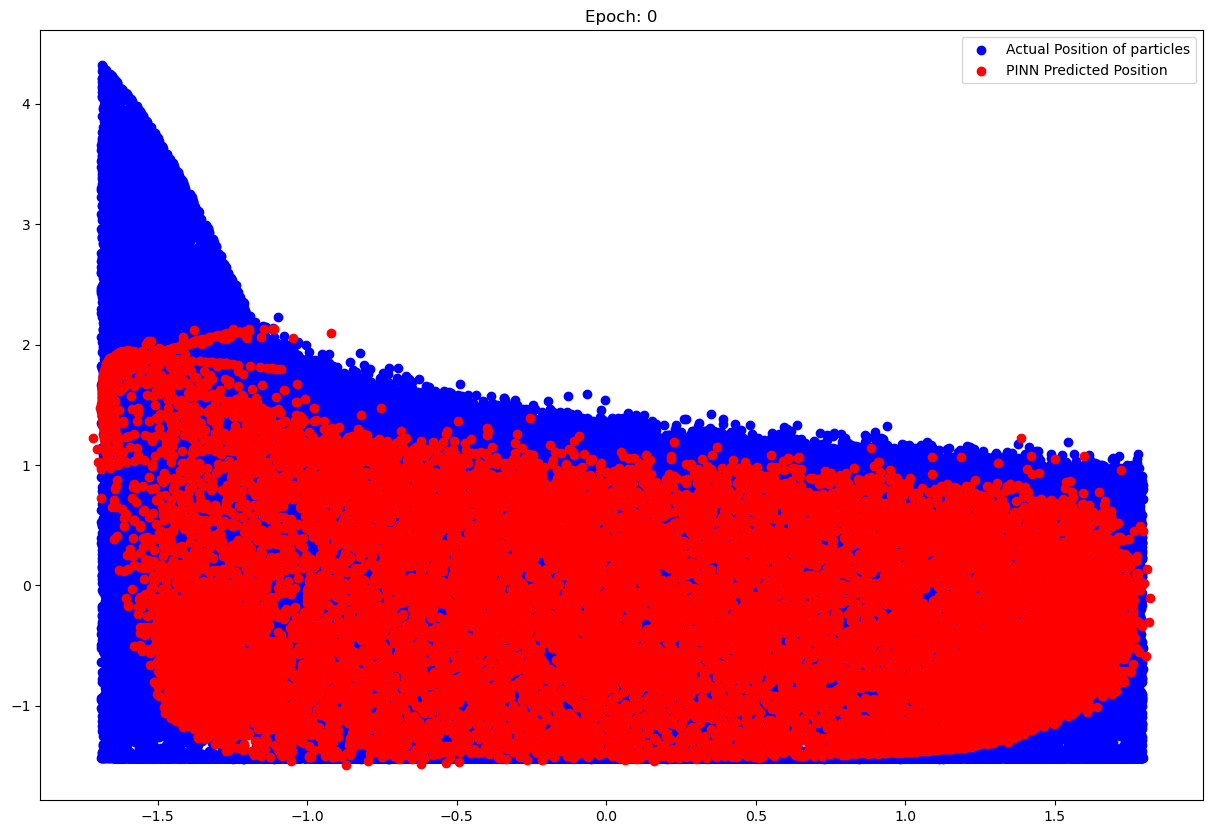

Now training Epoch: 1/500 ....>


2025-04-30 02:17:01.732595: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]


Now training Epoch: 2/500 ....>


2025-04-30 02:17:56.402511: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]


Now training Epoch: 3/500 ....>


Now training Epoch: 4/500 ....>


Now training Epoch: 5/500 ....>


2025-04-30 02:20:40.278733: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]


Now training Epoch: 6/500 ....>


Now training Epoch: 7/500 ....>


Now training Epoch: 8/500 ....>


Now training Epoch: 9/500 ....>


Now training Epoch: 10/500 ....>


2025-04-30 02:25:14.627092: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]


Now training Epoch: 11/500 ....>


Now training Epoch: 12/500 ....>


Now training Epoch: 13/500 ....>


Now training Epoch: 14/500 ....>


Now training Epoch: 15/500 ....>


Now training Epoch: 16/500 ....>


Now training Epoch: 17/500 ....>


Now training Epoch: 18/500 ....>


Now training Epoch: 19/500 ....>


Now training Epoch: 20/500 ....>


Now training Epoch: 21/500 ....>


2025-04-30 02:35:20.269833: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]


Now training Epoch: 22/500 ....>


Now training Epoch: 23/500 ....>


Now training Epoch: 24/500 ....>


Now training Epoch: 25/500 ....>


Average Loss: 0.07380068302154541, Validation_loss = 0.07581150531768799


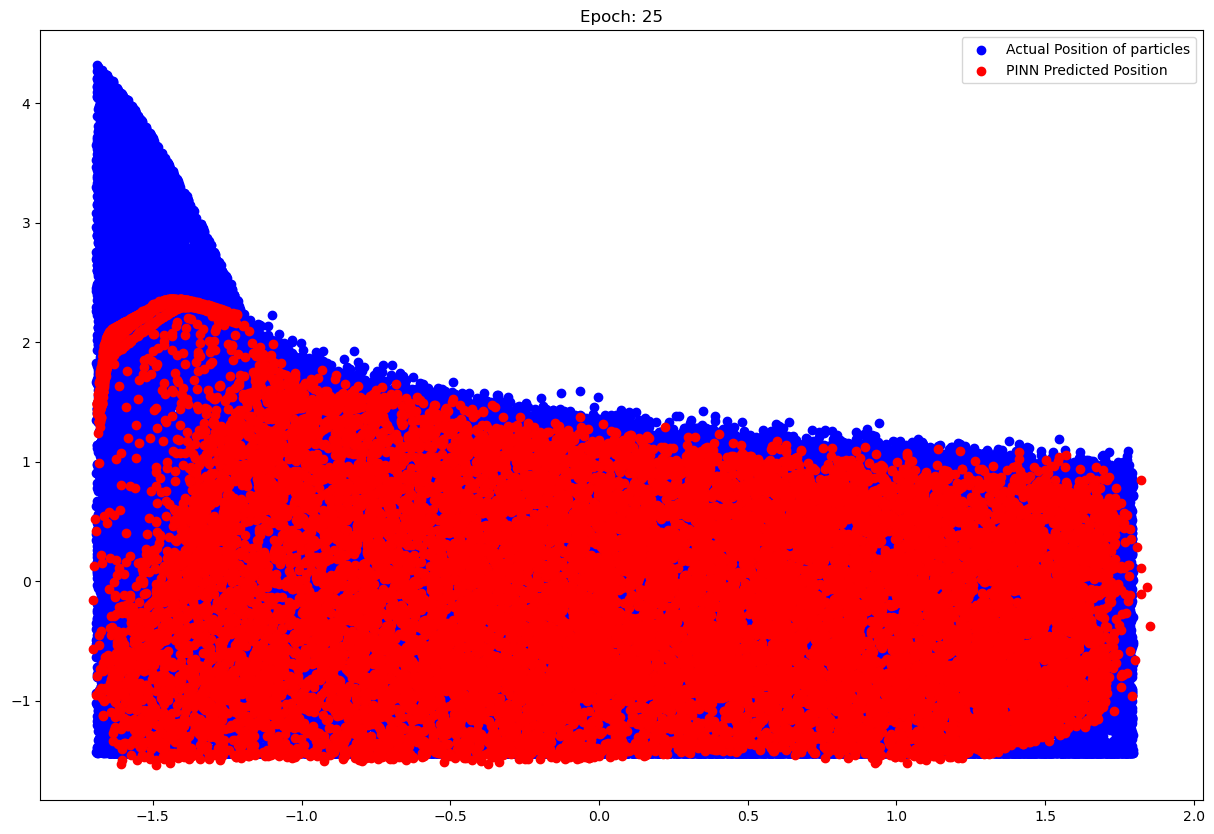

Now training Epoch: 26/500 ....>


Now training Epoch: 27/500 ....>


Now training Epoch: 28/500 ....>


Now training Epoch: 29/500 ....>


Now training Epoch: 30/500 ....>


Now training Epoch: 31/500 ....>


Now training Epoch: 32/500 ....>


Now training Epoch: 33/500 ....>


Now training Epoch: 34/500 ....>


Now training Epoch: 35/500 ....>


Now training Epoch: 36/500 ....>


Now training Epoch: 37/500 ....>


Now training Epoch: 38/500 ....>


Now training Epoch: 39/500 ....>


Now training Epoch: 40/500 ....>


Now training Epoch: 41/500 ....>


Now training Epoch: 42/500 ....>


2025-04-30 02:54:39.301600: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]


Now training Epoch: 43/500 ....>


Now training Epoch: 44/500 ....>


Now training Epoch: 45/500 ....>


Now training Epoch: 46/500 ....>


Now training Epoch: 47/500 ....>


Now training Epoch: 48/500 ....>


Now training Epoch: 49/500 ....>


Now training Epoch: 50/500 ....>


Average Loss: 0.07163139432668686, Validation_loss = 0.07427491992712021


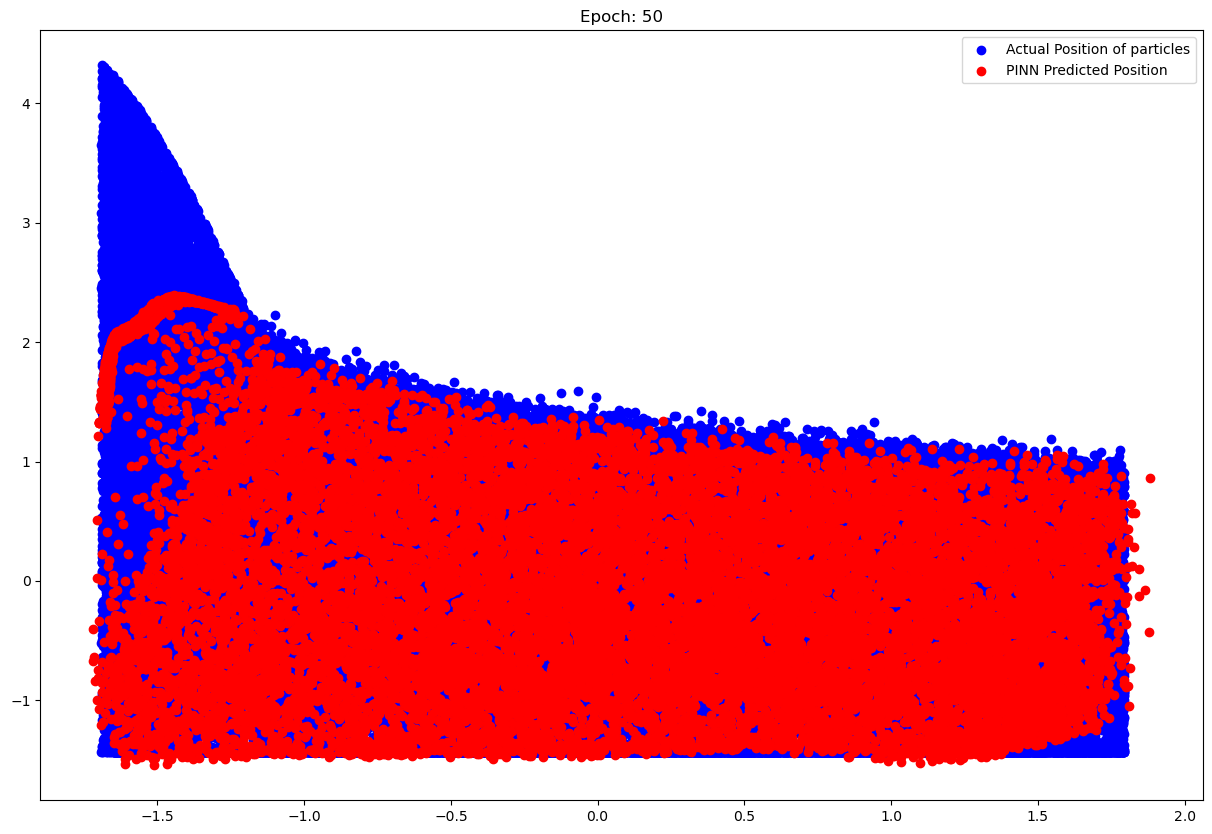

Now training Epoch: 51/500 ....>


Now training Epoch: 52/500 ....>


Now training Epoch: 53/500 ....>


Now training Epoch: 54/500 ....>


Now training Epoch: 55/500 ....>


Now training Epoch: 56/500 ....>


Now training Epoch: 57/500 ....>


Now training Epoch: 58/500 ....>


Now training Epoch: 59/500 ....>


Now training Epoch: 60/500 ....>


Now training Epoch: 61/500 ....>


Now training Epoch: 62/500 ....>


Now training Epoch: 63/500 ....>


Now training Epoch: 64/500 ....>


Now training Epoch: 65/500 ....>


Now training Epoch: 66/500 ....>


Now training Epoch: 67/500 ....>


Now training Epoch: 68/500 ....>


Now training Epoch: 69/500 ....>


Now training Epoch: 70/500 ....>


Now training Epoch: 71/500 ....>


Now training Epoch: 72/500 ....>


Now training Epoch: 73/500 ....>


Now training Epoch: 74/500 ....>


Now training Epoch: 75/500 ....>


Average Loss: 0.07114904373884201, Validation_loss = 0.07394054532051086


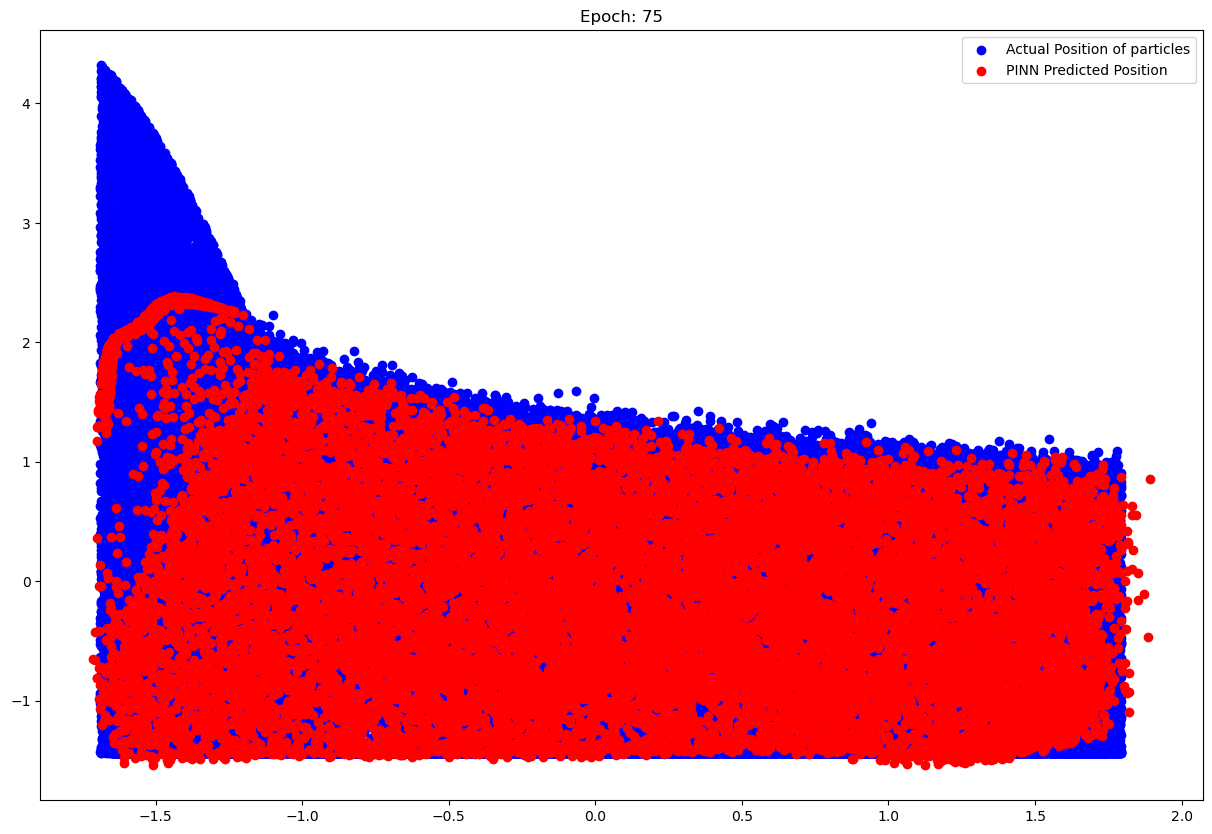

Now training Epoch: 76/500 ....>


Now training Epoch: 77/500 ....>


Now training Epoch: 78/500 ....>


Now training Epoch: 79/500 ....>


Now training Epoch: 80/500 ....>


Now training Epoch: 81/500 ....>


Now training Epoch: 82/500 ....>


Now training Epoch: 83/500 ....>


Now training Epoch: 84/500 ....>


Now training Epoch: 85/500 ....>


2025-04-30 03:34:17.031149: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]


Now training Epoch: 86/500 ....>


Now training Epoch: 87/500 ....>


Now training Epoch: 88/500 ....>


Now training Epoch: 89/500 ....>


Now training Epoch: 90/500 ....>


Now training Epoch: 91/500 ....>


Now training Epoch: 92/500 ....>


Now training Epoch: 93/500 ....>


Now training Epoch: 94/500 ....>


Now training Epoch: 95/500 ....>


Now training Epoch: 96/500 ....>


Now training Epoch: 97/500 ....>


Now training Epoch: 98/500 ....>


Now training Epoch: 99/500 ....>


Now training Epoch: 100/500 ....>


Average Loss: 0.07105155289173126, Validation_loss = 0.07388600707054138


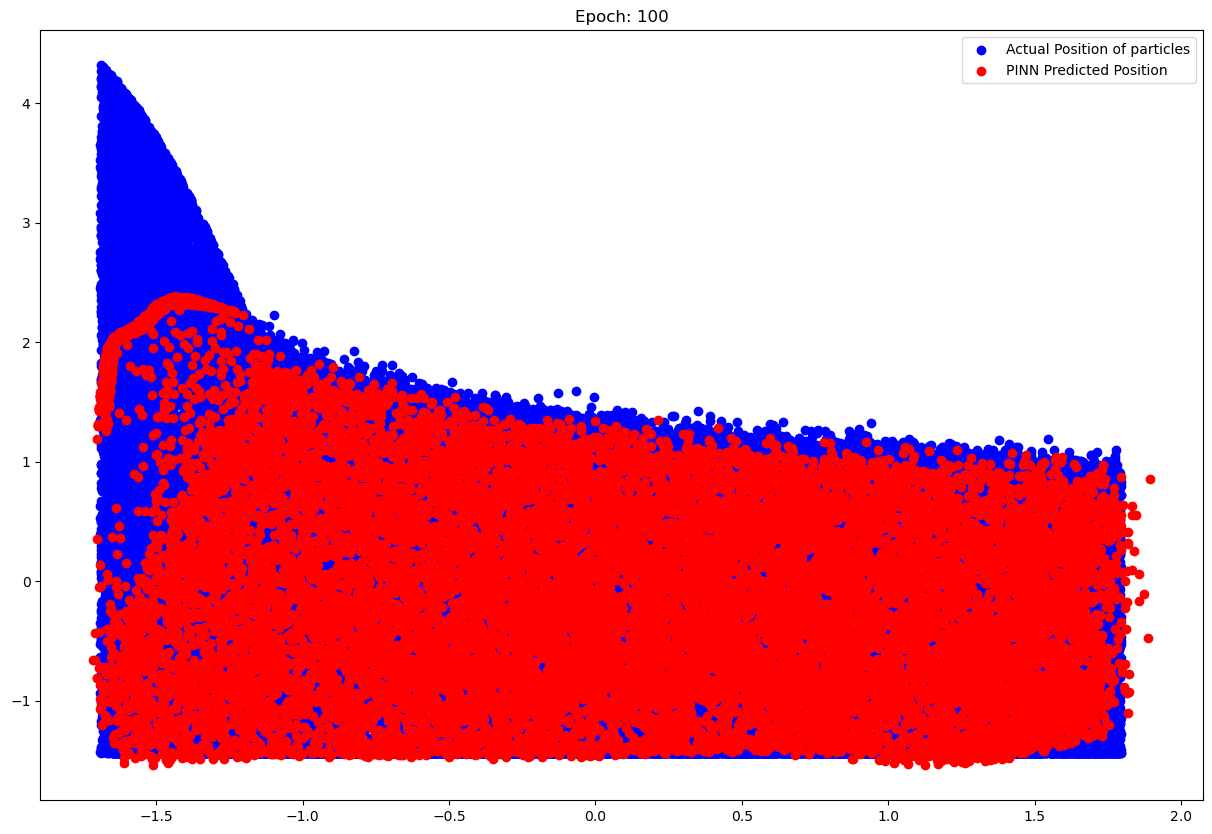

Now training Epoch: 101/500 ....>


Now training Epoch: 102/500 ....>


Now training Epoch: 103/500 ....>


Now training Epoch: 104/500 ....>


Now training Epoch: 105/500 ....>


Now training Epoch: 106/500 ....>


Now training Epoch: 107/500 ....>


Now training Epoch: 108/500 ....>


Now training Epoch: 109/500 ....>


Now training Epoch: 110/500 ....>


Now training Epoch: 111/500 ....>


Now training Epoch: 112/500 ....>


Now training Epoch: 113/500 ....>


Now training Epoch: 114/500 ....>


Now training Epoch: 115/500 ....>


Now training Epoch: 116/500 ....>


Now training Epoch: 117/500 ....>


Now training Epoch: 118/500 ....>


Now training Epoch: 119/500 ....>


Now training Epoch: 120/500 ....>


Now training Epoch: 121/500 ....>


Now training Epoch: 122/500 ....>


Now training Epoch: 123/500 ....>


Now training Epoch: 124/500 ....>


Now training Epoch: 125/500 ....>


Average Loss: 0.07103167474269867, Validation_loss = 0.0738821029663086


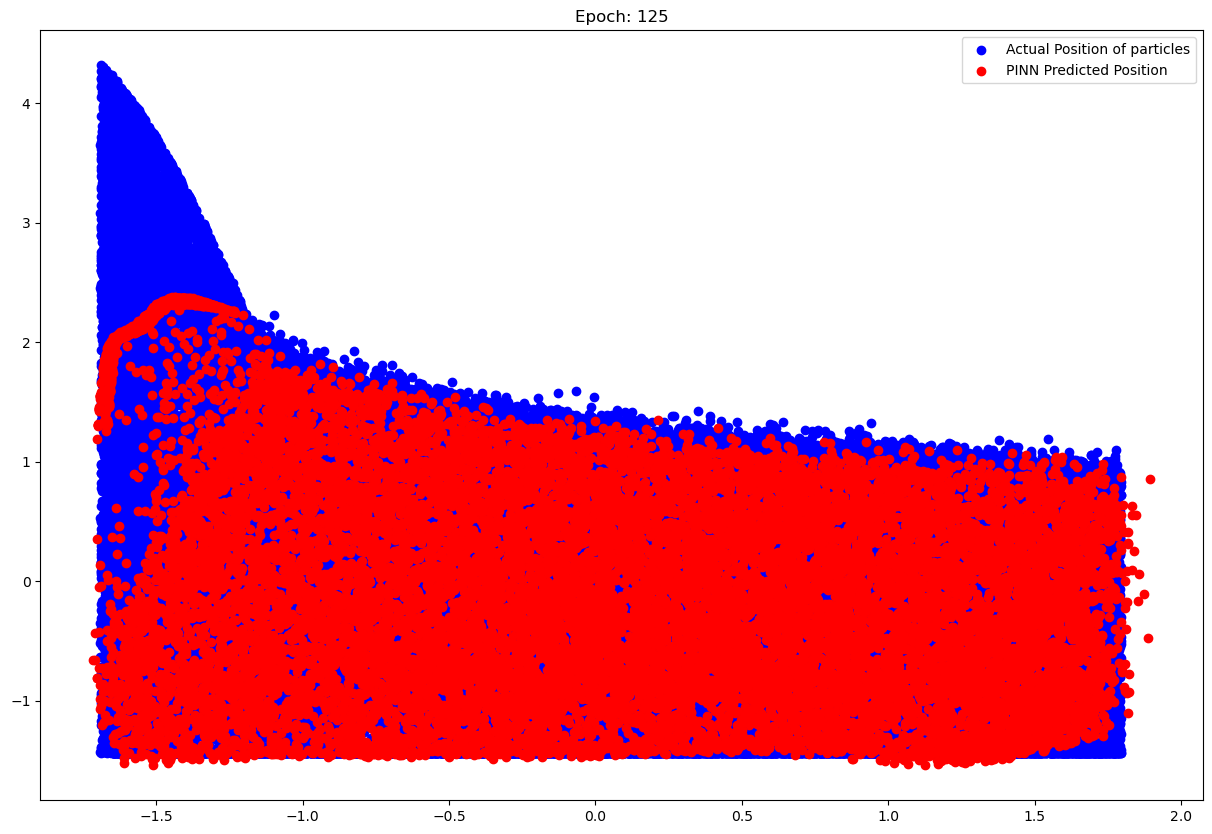

Now training Epoch: 126/500 ....>


Now training Epoch: 127/500 ....>


Now training Epoch: 128/500 ....>


Now training Epoch: 129/500 ....>


Now training Epoch: 130/500 ....>


Now training Epoch: 131/500 ....>


Now training Epoch: 132/500 ....>


Now training Epoch: 133/500 ....>


Now training Epoch: 134/500 ....>


Now training Epoch: 135/500 ....>


Now training Epoch: 136/500 ....>


Now training Epoch: 137/500 ....>


Now training Epoch: 138/500 ....>


Now training Epoch: 139/500 ....>


Now training Epoch: 140/500 ....>


Now training Epoch: 141/500 ....>


Now training Epoch: 142/500 ....>


Now training Epoch: 143/500 ....>


Now training Epoch: 144/500 ....>


Now training Epoch: 145/500 ....>


Now training Epoch: 146/500 ....>


Now training Epoch: 147/500 ....>


Now training Epoch: 148/500 ....>


Now training Epoch: 149/500 ....>


Now training Epoch: 150/500 ....>


Average Loss: 0.07102866470813751, Validation_loss = 0.07388238608837128


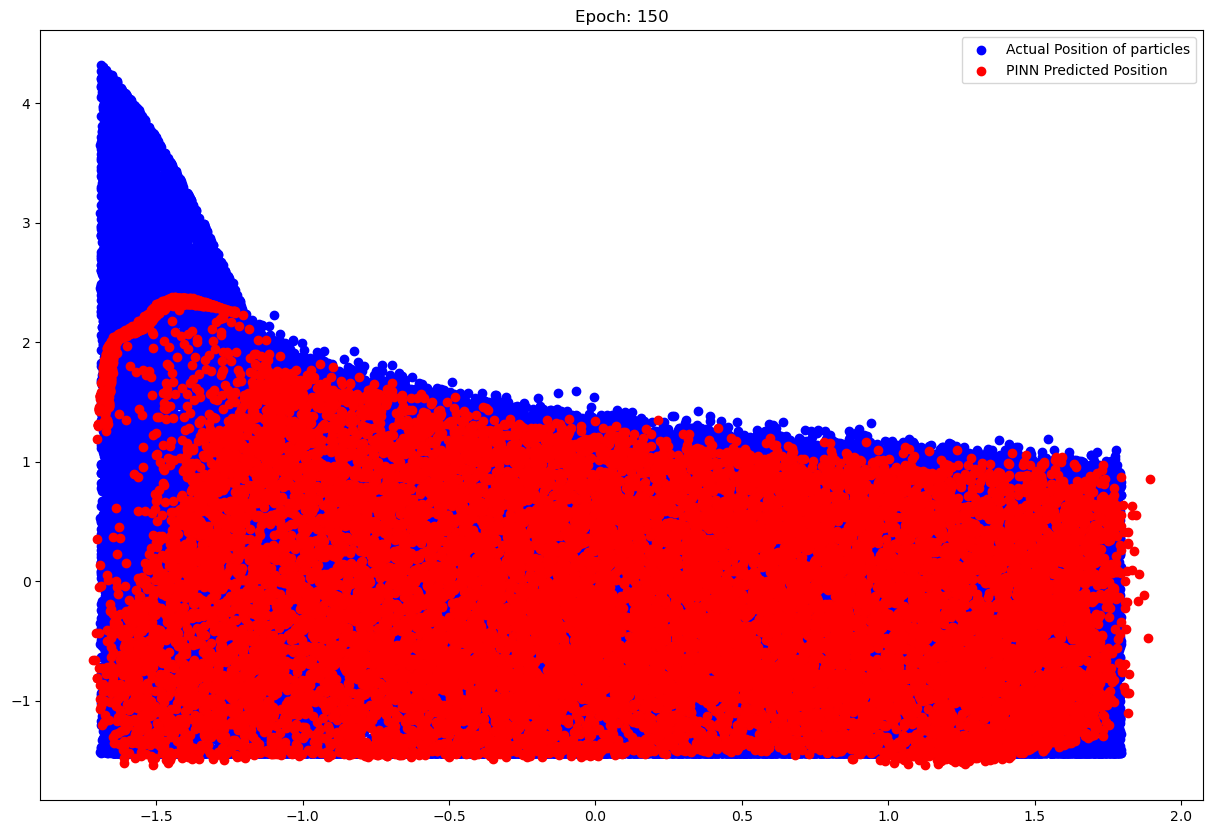

Now training Epoch: 151/500 ....>


Now training Epoch: 152/500 ....>


Now training Epoch: 153/500 ....>


Now training Epoch: 154/500 ....>


Now training Epoch: 155/500 ....>


Now training Epoch: 156/500 ....>


Now training Epoch: 157/500 ....>


Now training Epoch: 158/500 ....>


Now training Epoch: 159/500 ....>


Now training Epoch: 160/500 ....>


Now training Epoch: 161/500 ....>


Now training Epoch: 162/500 ....>


Now training Epoch: 163/500 ....>


Now training Epoch: 164/500 ....>


Now training Epoch: 165/500 ....>


Now training Epoch: 166/500 ....>


Now training Epoch: 167/500 ....>


Now training Epoch: 168/500 ....>


Now training Epoch: 169/500 ....>


Now training Epoch: 170/500 ....>


2025-04-30 04:51:16.343401: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]


Now training Epoch: 171/500 ....>


Now training Epoch: 172/500 ....>


Now training Epoch: 173/500 ....>


Now training Epoch: 174/500 ....>


Now training Epoch: 175/500 ....>


Average Loss: 0.07102731615304947, Validation_loss = 0.07388263940811157


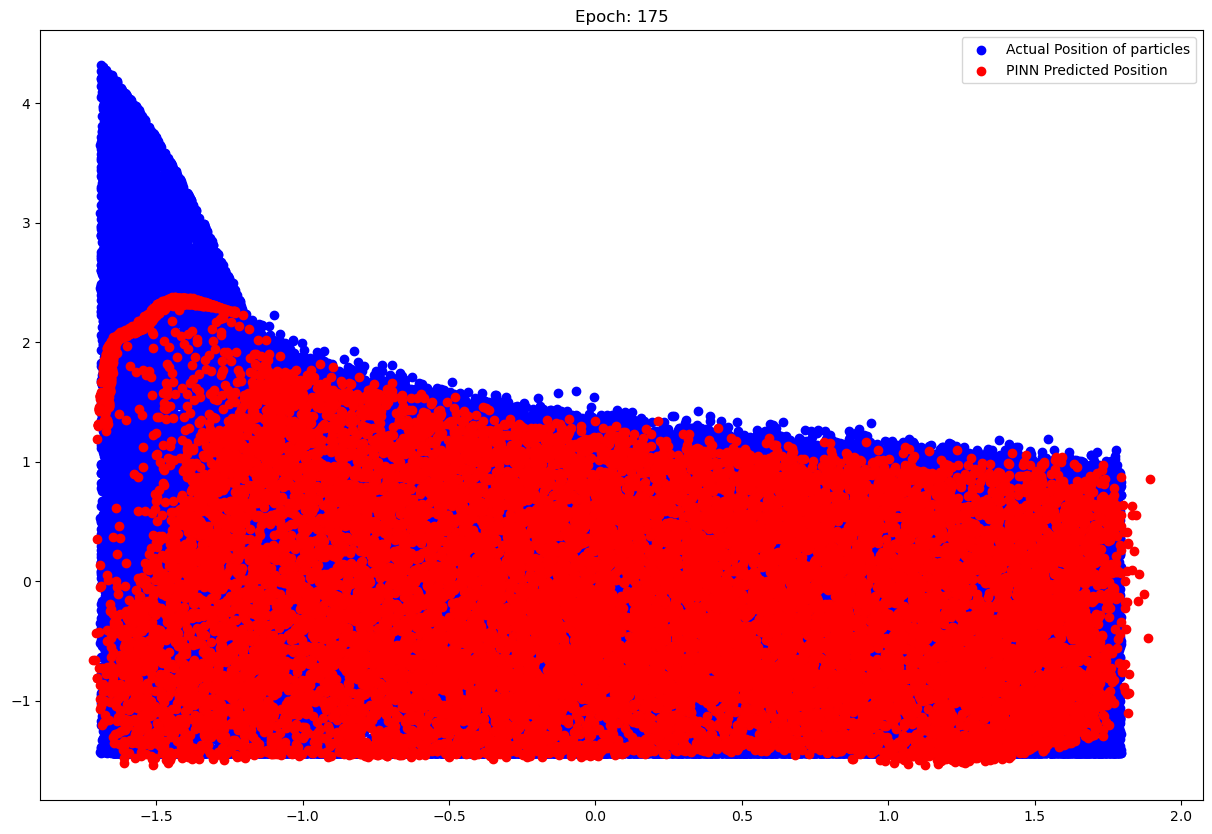

Now training Epoch: 176/500 ....>


Now training Epoch: 177/500 ....>


Now training Epoch: 178/500 ....>


Now training Epoch: 179/500 ....>


Now training Epoch: 180/500 ....>


Now training Epoch: 181/500 ....>


Now training Epoch: 182/500 ....>


Now training Epoch: 183/500 ....>


Now training Epoch: 184/500 ....>


Now training Epoch: 185/500 ....>


Now training Epoch: 186/500 ....>


Now training Epoch: 187/500 ....>


Now training Epoch: 188/500 ....>


Now training Epoch: 189/500 ....>


Now training Epoch: 190/500 ....>


Now training Epoch: 191/500 ....>


Now training Epoch: 192/500 ....>


Now training Epoch: 193/500 ....>


Now training Epoch: 194/500 ....>


Now training Epoch: 195/500 ....>


Now training Epoch: 196/500 ....>


Now training Epoch: 197/500 ....>


Now training Epoch: 198/500 ....>


Now training Epoch: 199/500 ....>


Now training Epoch: 200/500 ....>


Average Loss: 0.0710269957780838, Validation_loss = 0.07388249039649963


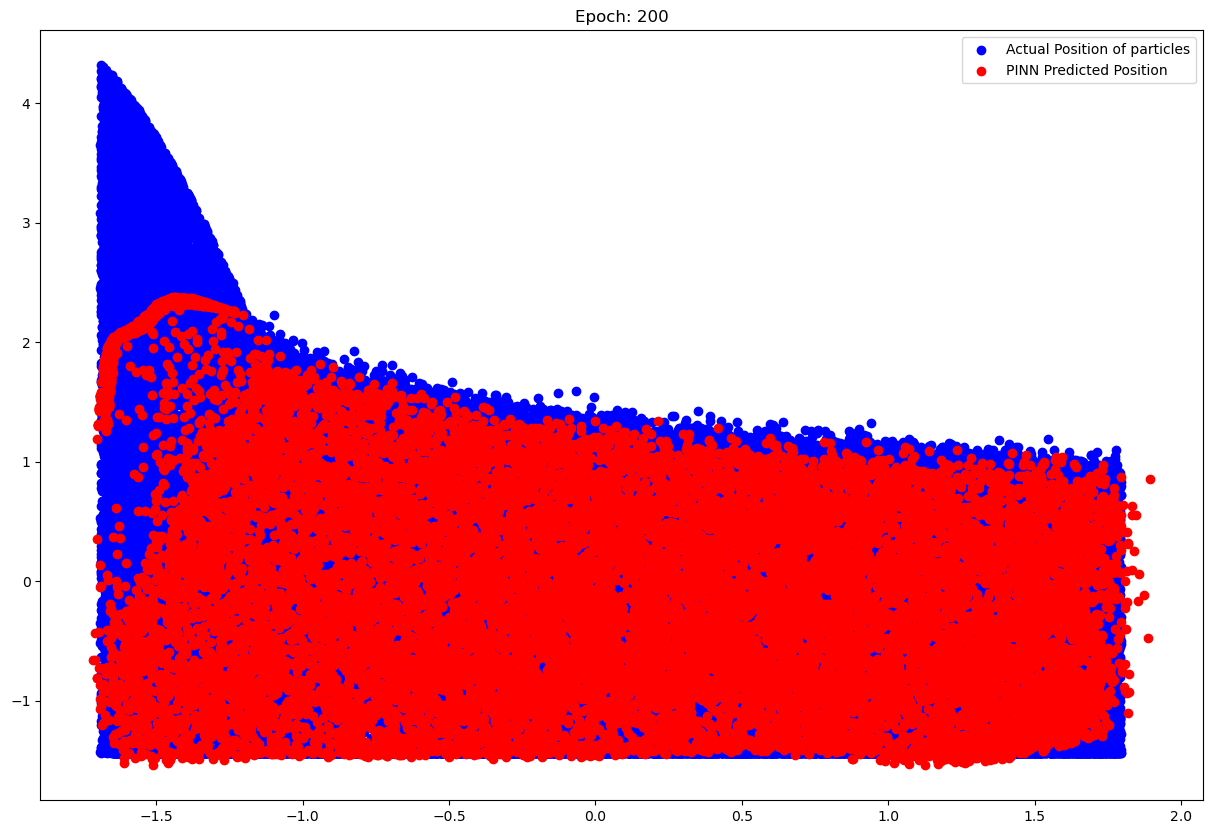

Now training Epoch: 201/500 ....>


Now training Epoch: 202/500 ....>


Now training Epoch: 203/500 ....>


Now training Epoch: 204/500 ....>


Now training Epoch: 205/500 ....>


Now training Epoch: 206/500 ....>


Now training Epoch: 207/500 ....>


Now training Epoch: 208/500 ....>


Now training Epoch: 209/500 ....>


Now training Epoch: 210/500 ....>


Now training Epoch: 211/500 ....>


Now training Epoch: 212/500 ....>


Now training Epoch: 213/500 ....>


Now training Epoch: 214/500 ....>


Now training Epoch: 215/500 ....>


Now training Epoch: 216/500 ....>


Now training Epoch: 217/500 ....>


Now training Epoch: 218/500 ....>


Now training Epoch: 219/500 ....>


Now training Epoch: 220/500 ....>


Now training Epoch: 221/500 ....>


Now training Epoch: 222/500 ....>


Now training Epoch: 223/500 ....>


Now training Epoch: 224/500 ....>


Now training Epoch: 225/500 ....>


Average Loss: 0.07102695852518082, Validation_loss = 0.07388254255056381


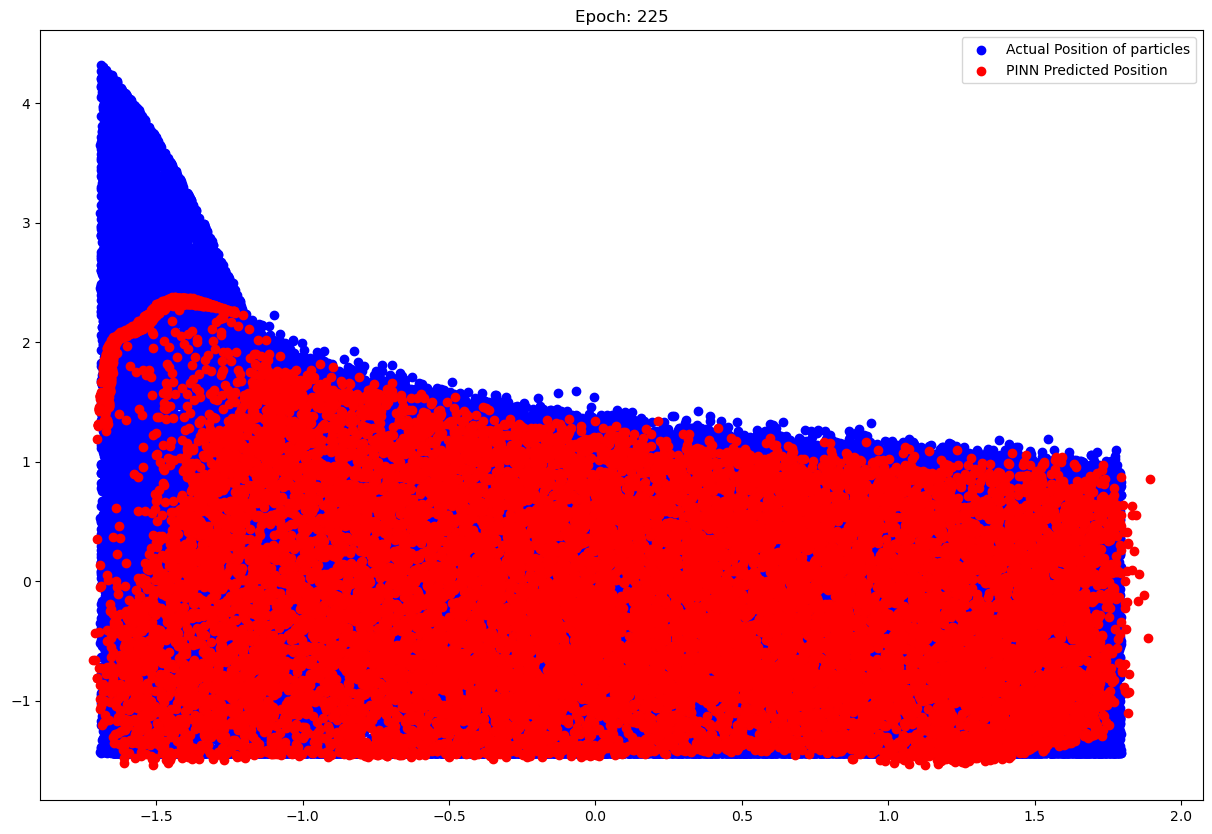

Now training Epoch: 226/500 ....>


Now training Epoch: 227/500 ....>


Now training Epoch: 228/500 ....>


Now training Epoch: 229/500 ....>


Now training Epoch: 230/500 ....>


Now training Epoch: 231/500 ....>


Now training Epoch: 232/500 ....>


Now training Epoch: 233/500 ....>


Now training Epoch: 234/500 ....>


Now training Epoch: 235/500 ....>


Now training Epoch: 236/500 ....>


Now training Epoch: 237/500 ....>


Now training Epoch: 238/500 ....>


Now training Epoch: 239/500 ....>


Now training Epoch: 240/500 ....>


Now training Epoch: 241/500 ....>


Now training Epoch: 242/500 ....>


Now training Epoch: 243/500 ....>


Now training Epoch: 244/500 ....>


Now training Epoch: 245/500 ....>


Now training Epoch: 246/500 ....>


Now training Epoch: 247/500 ....>


Now training Epoch: 248/500 ....>


Now training Epoch: 249/500 ....>


Now training Epoch: 250/500 ....>


Average Loss: 0.0710269957780838, Validation_loss = 0.07388252019882202


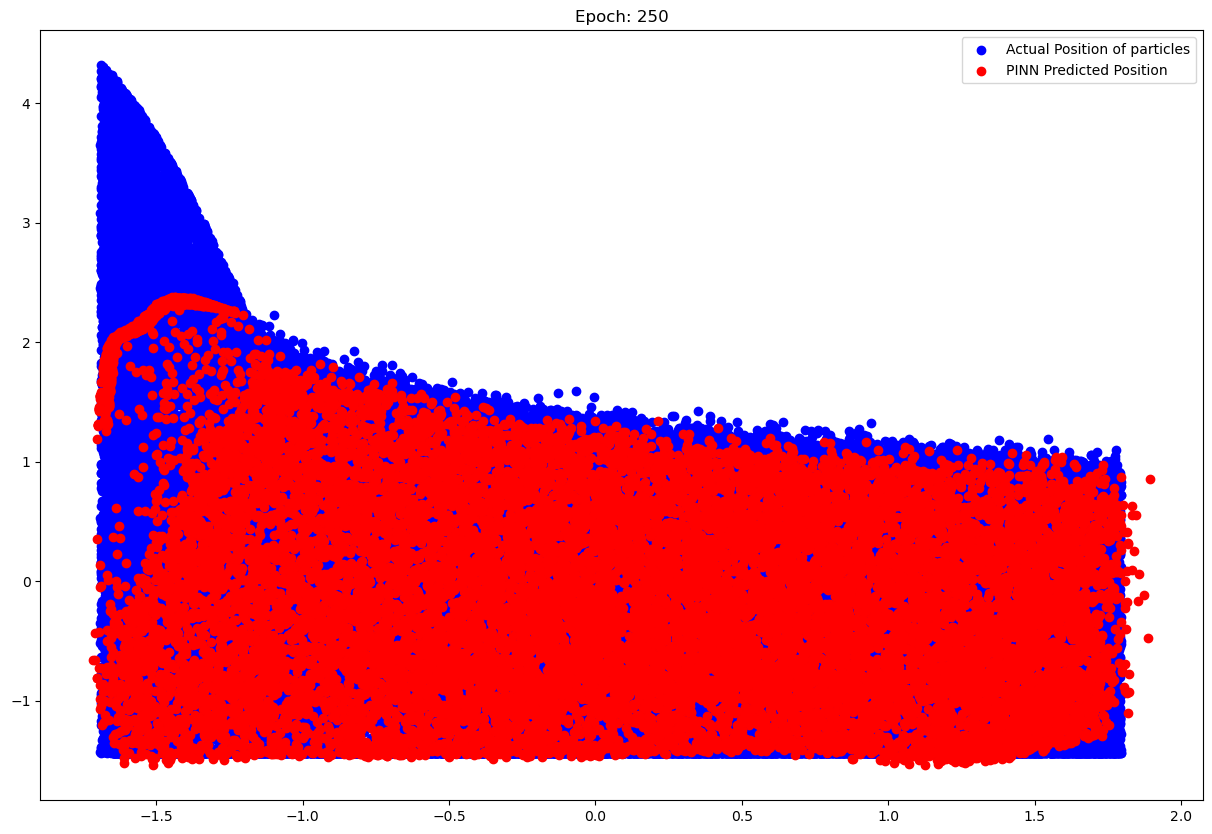

Now training Epoch: 251/500 ....>


Now training Epoch: 252/500 ....>


Now training Epoch: 253/500 ....>


Now training Epoch: 254/500 ....>


Now training Epoch: 255/500 ....>


Now training Epoch: 256/500 ....>


Now training Epoch: 257/500 ....>


Now training Epoch: 258/500 ....>


Now training Epoch: 259/500 ....>


Now training Epoch: 260/500 ....>


Now training Epoch: 261/500 ....>


Now training Epoch: 262/500 ....>


Now training Epoch: 263/500 ....>


Now training Epoch: 264/500 ....>


Now training Epoch: 265/500 ....>


Now training Epoch: 266/500 ....>


Now training Epoch: 267/500 ....>


Now training Epoch: 268/500 ....>


Now training Epoch: 269/500 ....>


Now training Epoch: 270/500 ....>


Now training Epoch: 271/500 ....>


Now training Epoch: 272/500 ....>


Now training Epoch: 273/500 ....>


Now training Epoch: 274/500 ....>


Now training Epoch: 275/500 ....>


Average Loss: 0.0710269883275032, Validation_loss = 0.07388252019882202


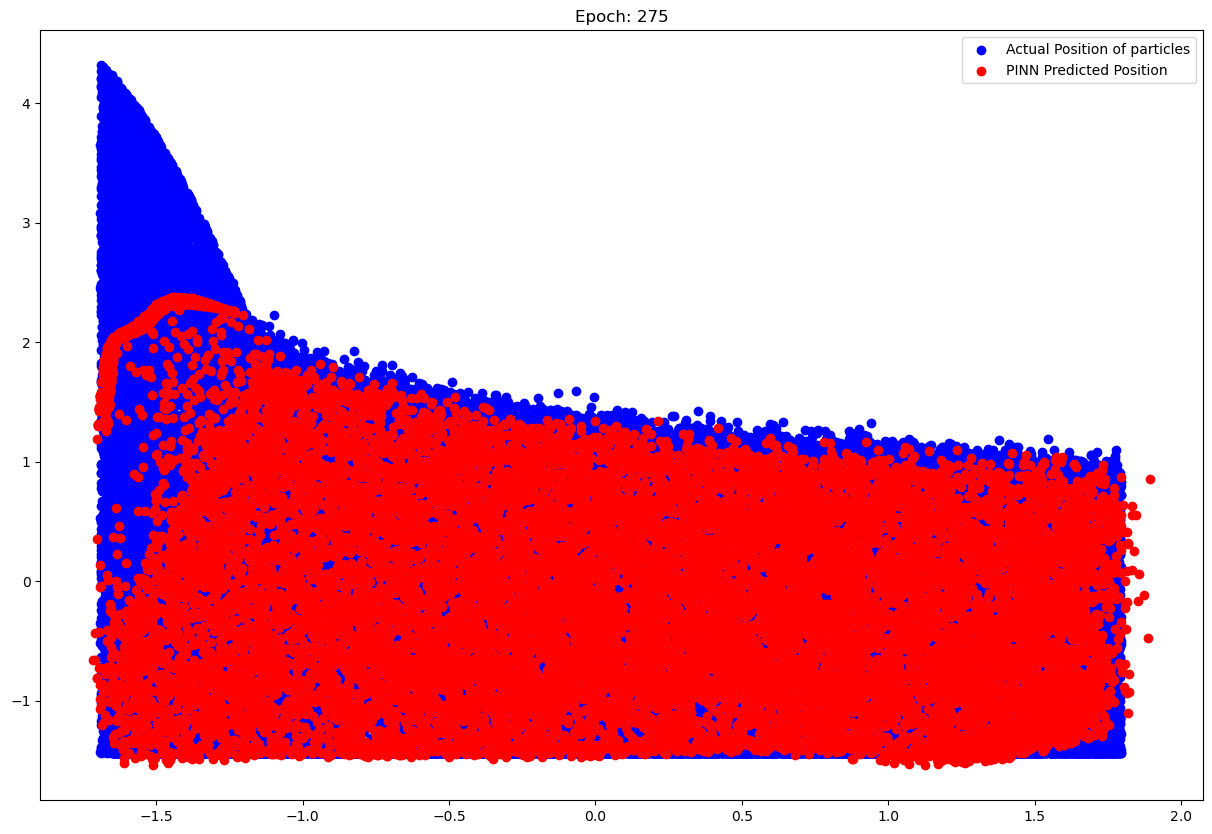

Now training Epoch: 276/500 ....>


Now training Epoch: 277/500 ....>


Now training Epoch: 278/500 ....>


Now training Epoch: 279/500 ....>


Now training Epoch: 280/500 ....>


Now training Epoch: 281/500 ....>


Now training Epoch: 282/500 ....>


Now training Epoch: 283/500 ....>


Now training Epoch: 284/500 ....>


Now training Epoch: 285/500 ....>


Now training Epoch: 286/500 ....>


Now training Epoch: 287/500 ....>


Now training Epoch: 288/500 ....>


Now training Epoch: 289/500 ....>


Now training Epoch: 290/500 ....>


Now training Epoch: 291/500 ....>


Now training Epoch: 292/500 ....>


Now training Epoch: 293/500 ....>


Now training Epoch: 294/500 ....>


Now training Epoch: 295/500 ....>


Now training Epoch: 296/500 ....>


Now training Epoch: 297/500 ....>


Now training Epoch: 298/500 ....>


Now training Epoch: 299/500 ....>


Now training Epoch: 300/500 ....>


Average Loss: 0.0710269883275032, Validation_loss = 0.07388252019882202


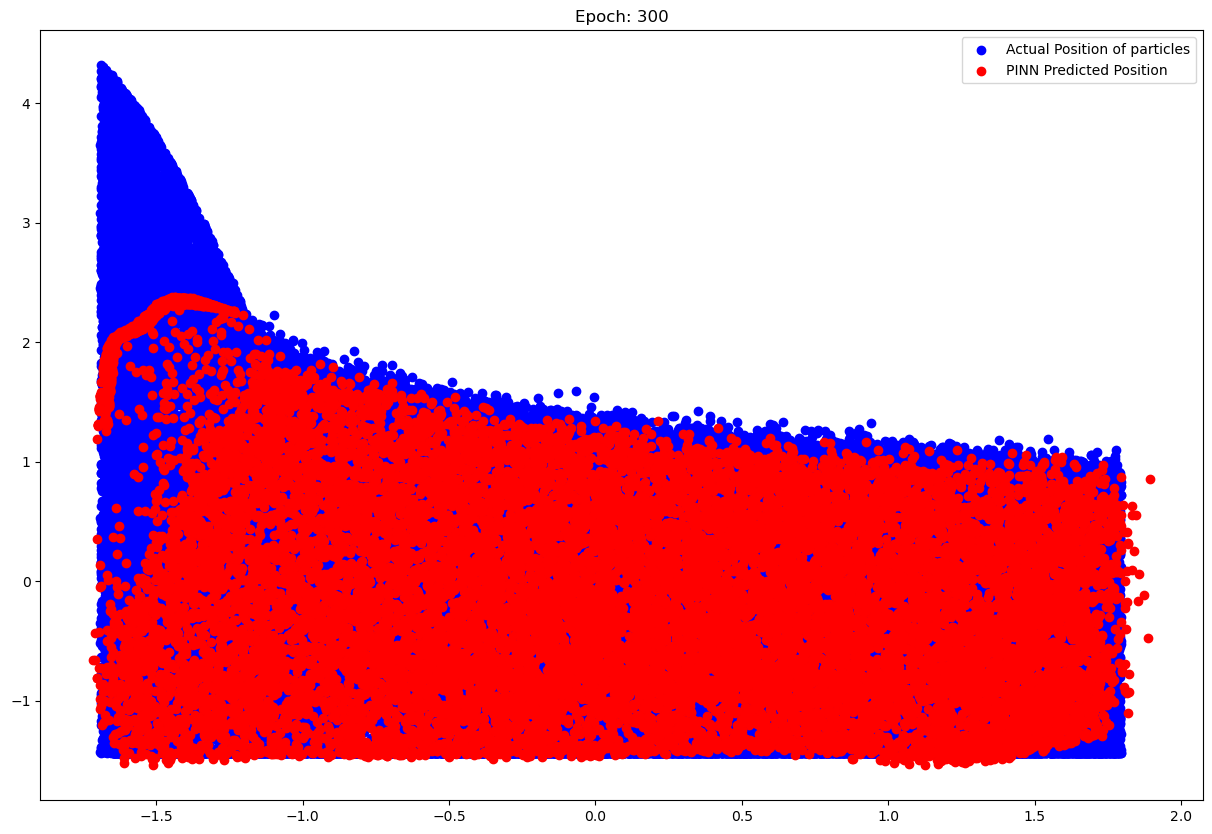

Now training Epoch: 301/500 ....>


Now training Epoch: 302/500 ....>


Now training Epoch: 303/500 ....>


Now training Epoch: 304/500 ....>


Now training Epoch: 305/500 ....>


Now training Epoch: 306/500 ....>


Now training Epoch: 307/500 ....>


Now training Epoch: 308/500 ....>


Now training Epoch: 309/500 ....>


Now training Epoch: 310/500 ....>


Now training Epoch: 311/500 ....>


Now training Epoch: 312/500 ....>


Now training Epoch: 313/500 ....>


Now training Epoch: 314/500 ....>


Now training Epoch: 315/500 ....>


Now training Epoch: 316/500 ....>


Now training Epoch: 317/500 ....>


Now training Epoch: 318/500 ....>


Now training Epoch: 319/500 ....>


Now training Epoch: 320/500 ....>


Now training Epoch: 321/500 ....>


Now training Epoch: 322/500 ....>


Now training Epoch: 323/500 ....>


Now training Epoch: 324/500 ....>


Now training Epoch: 325/500 ....>


Average Loss: 0.0710269883275032, Validation_loss = 0.07388252019882202


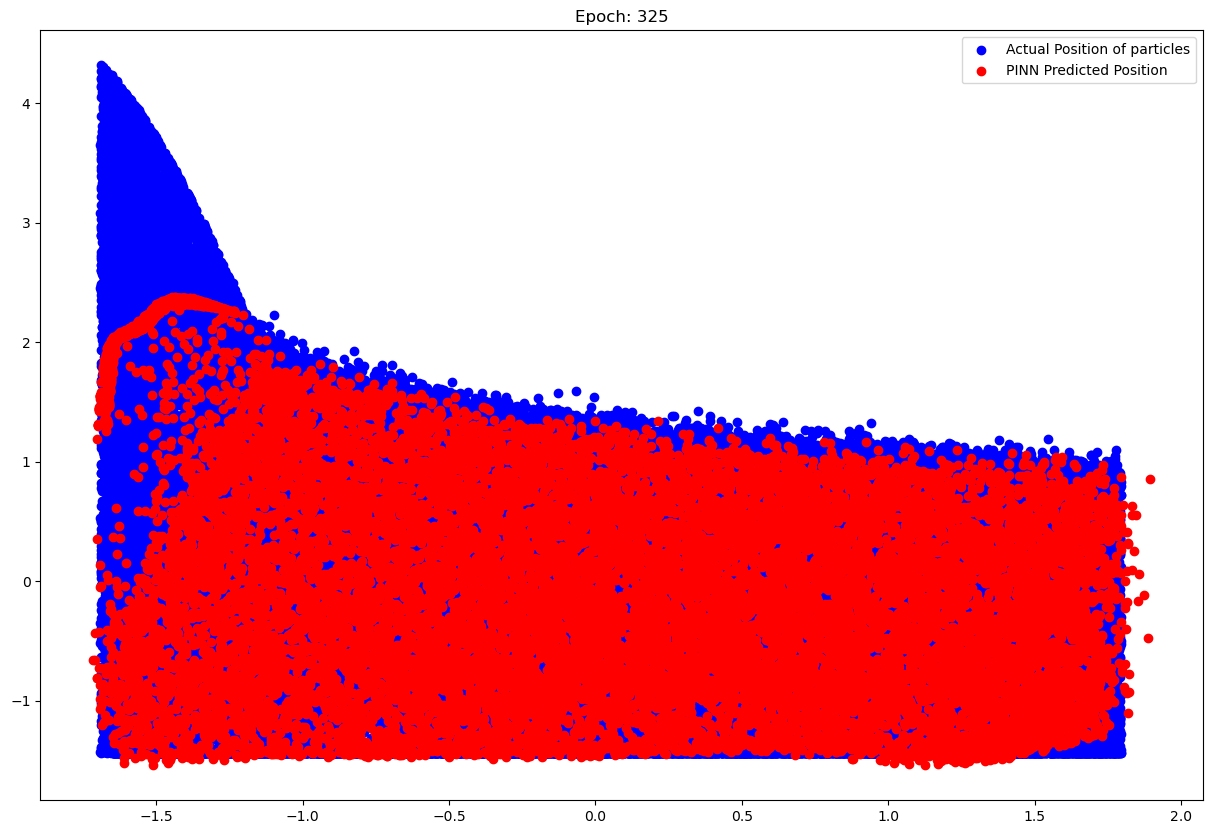

Now training Epoch: 326/500 ....>


Now training Epoch: 327/500 ....>


Now training Epoch: 328/500 ....>


Now training Epoch: 329/500 ....>


Now training Epoch: 330/500 ....>


Now training Epoch: 331/500 ....>


Now training Epoch: 332/500 ....>


Now training Epoch: 333/500 ....>


Now training Epoch: 334/500 ....>


Early trigger activated


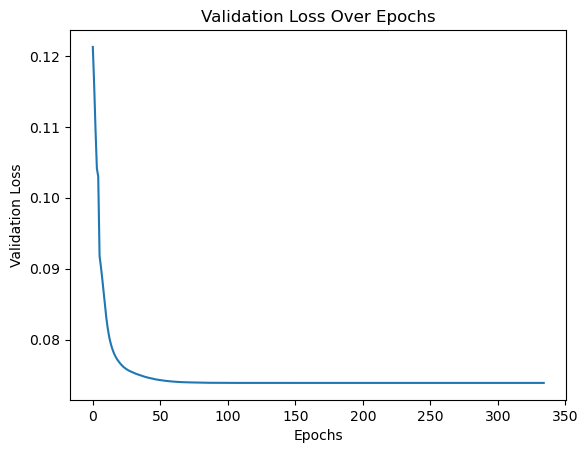

In [48]:
epochs =500


strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
with strategy.scope():
    model = create_model()
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,
                                                                 decay_steps = 1000, 
                                                                 decay_rate = 0.9
                                                                )
    # optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
    train_model(model, x_train_Tensor, y_train_Tensor, X_val_Tensor, y_val_Tensor, optimizer, epochs=epochs, batch_size=128, gravity=9.81/characteristic_acceleration)

In [49]:
y_preds = call_model(model,x_test_Tensor)
y_preds

<tf.Tensor: shape=(18000, 2), dtype=float32, numpy=
array([[-0.07460736, -0.9674163 ],
       [-0.3606095 ,  0.32784382],
       [ 0.6437186 , -1.4157804 ],
       ...,
       [ 1.0549108 , -0.77647567],
       [ 1.0523921 ,  0.32813215],
       [-0.21475936, -1.2553495 ]], dtype=float32)>

In [50]:
y_test_Tensor

<tf.Tensor: shape=(18000, 2), dtype=float32, numpy=
array([[-0.1287311 , -0.9543114 ],
       [-0.3470719 ,  0.45928398],
       [ 0.4163463 , -1.4361094 ],
       ...,
       [ 0.9291244 , -0.9415472 ],
       [ 1.0542997 ,  0.31113943],
       [-0.4253172 , -1.393392  ]], dtype=float32)>

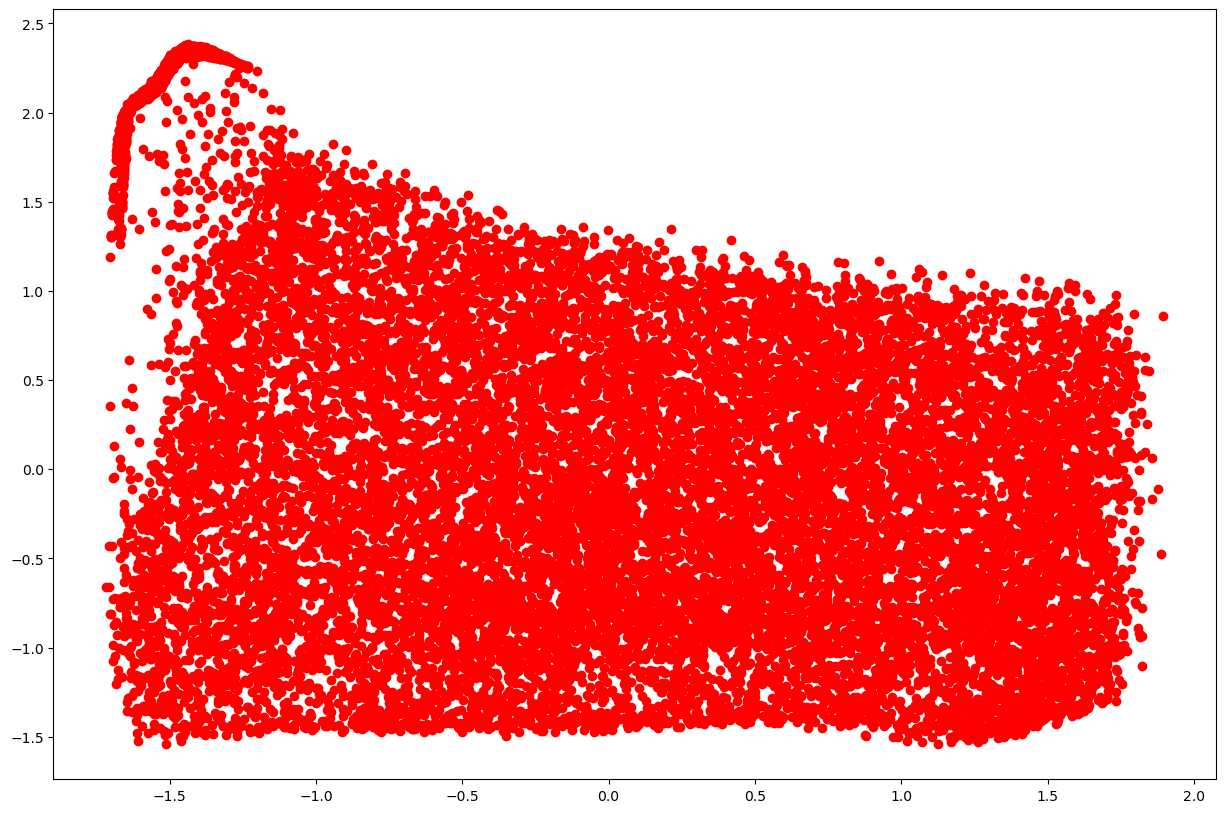

In [51]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')
plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')
# plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')

plt.show()

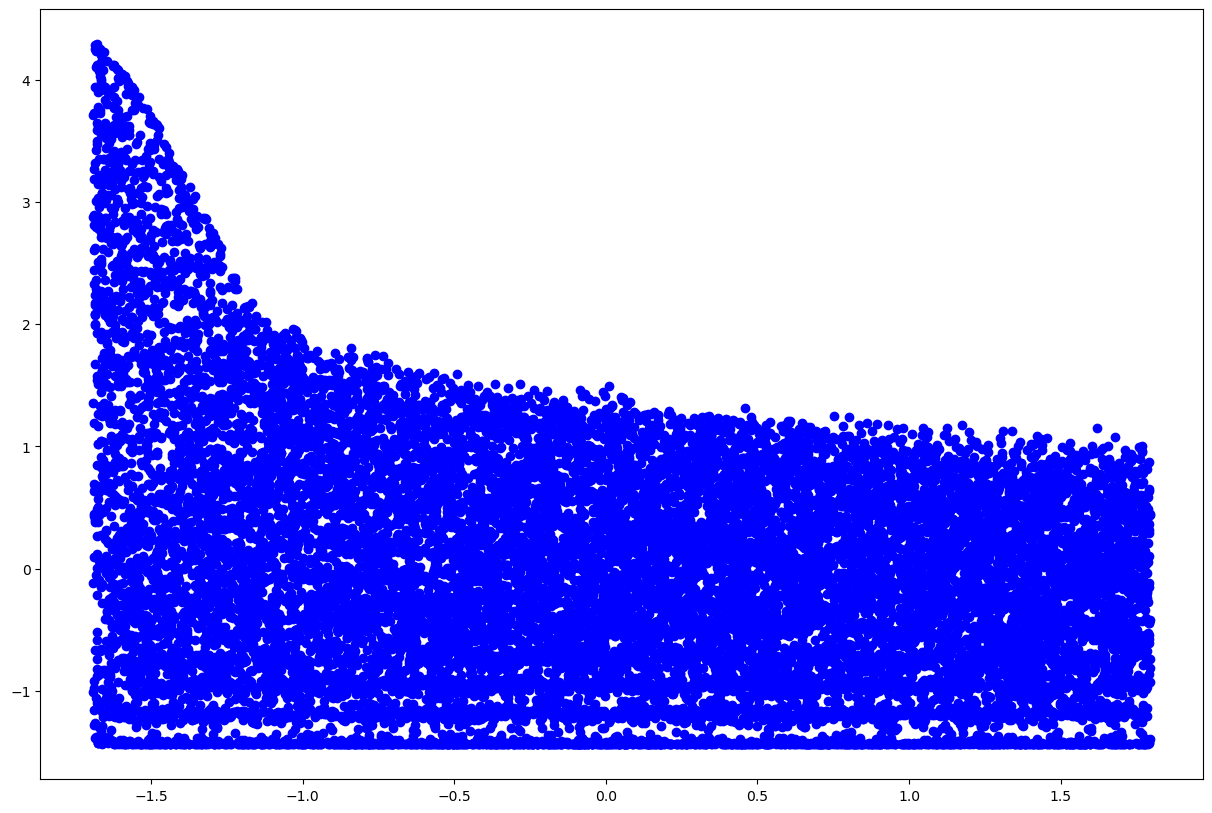

In [52]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')
plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
# plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')


plt.show()

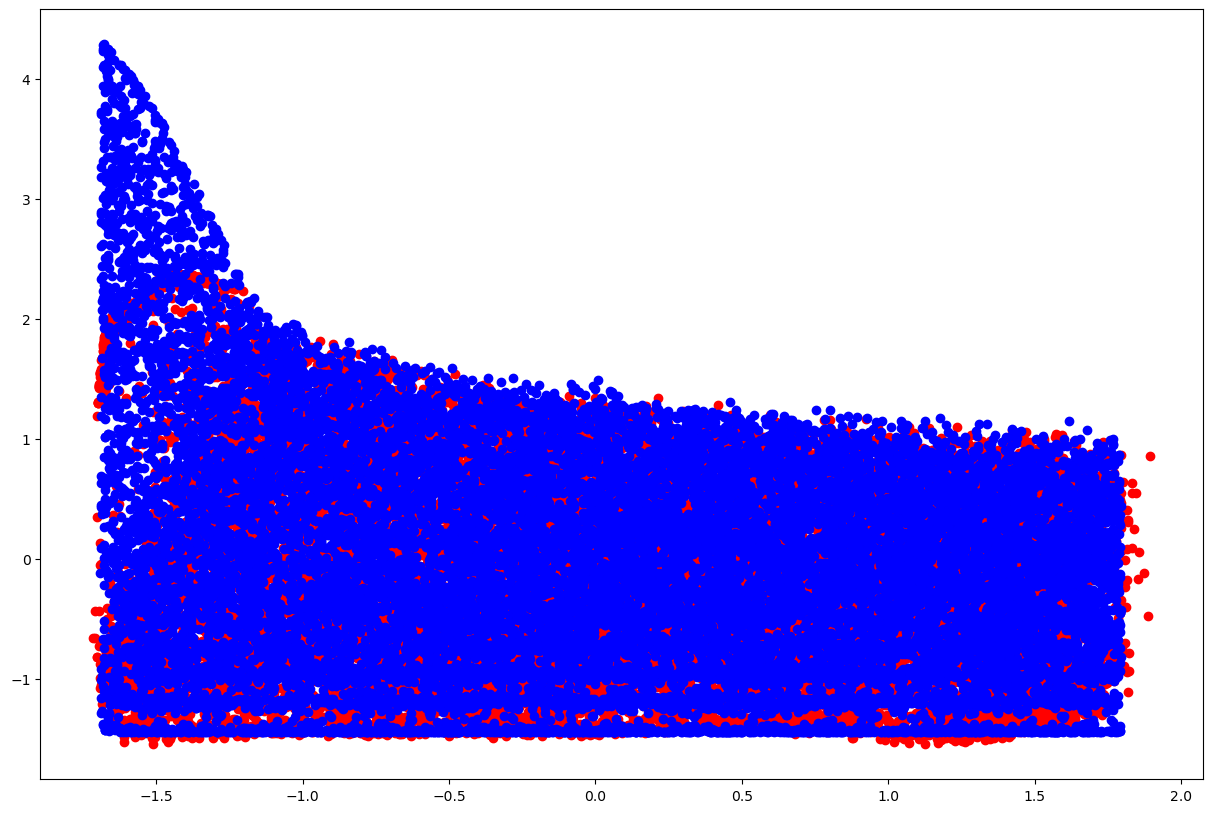

In [53]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')

plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')
plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
plt.savefig('./overlay PINN on actual on 2D plane.png')

plt.show()

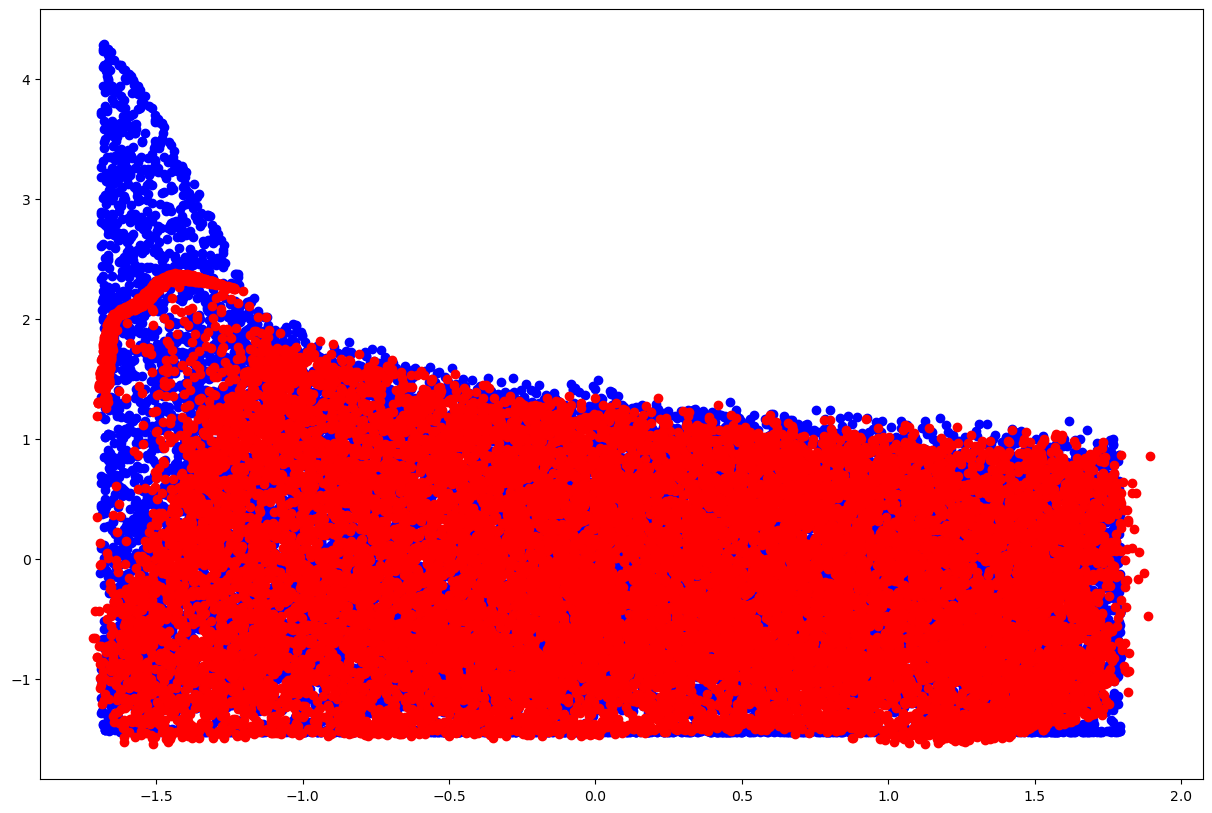

In [54]:
fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1,1,1, projection='3d')

plt.scatter(y_test_Tensor[:,0:1],y_test_Tensor[:,1:],color= 'blue', label = 'Actual Position of particles')
plt.scatter(y_preds[:,0:1],y_preds[:,1:], color= 'red', label= 'PINN Predicted Position')

plt.savefig('./overlay of actual on PINN in 2D plane.png')

plt.show()

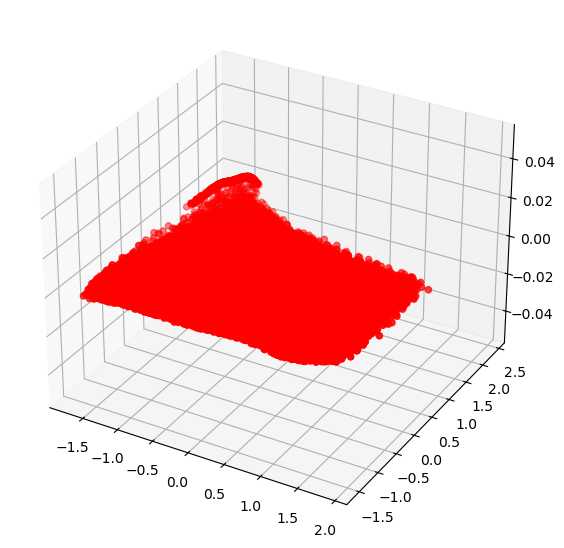

In [55]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
# ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./PINNs predicted position.png')
plt.show()

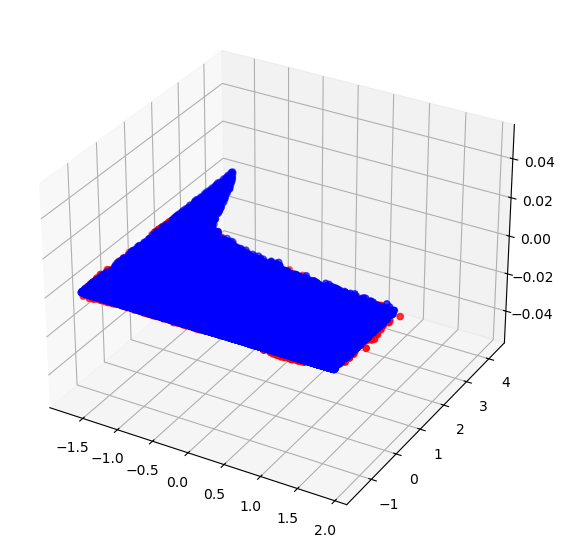

In [56]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./Combined plot of the Actual and Prediced positions of the particles.png')
plt.show()

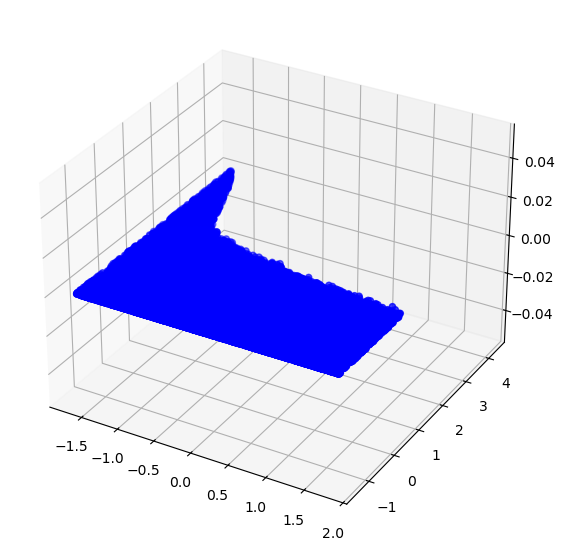

In [57]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(y_test_Tensor[:20000,0:1],y_test_Tensor[:20000,1:],color= 'blue', label = 'Actual Position of particles')
# ax.scatter(y_preds[:20000,0:1],y_preds[:20000,1:], color= 'red', label= 'PINN Predicted Position')
plt.savefig('./Actual position of the particles.png')
plt.show()


In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error,          
          
         }
PINNs_scores={}

for key,value in metrics.items():
    PINNs_scores[key]=value(y_test_Tensor.numpy(), y_preds.numpy())


PINNs_scores

{'r-squared': 0.9318447113037109,
 'Mean absolute error (MAE)': 0.1462220847606659,
 'Mean squared error(MSE)': 0.06837629526853561}

In [59]:
scores_table= pd.DataFrame(PINNs_scores.values(), index=PINNs_scores.keys(), columns=["Values"])
scores_table.to_csv('#PINNs_scores.csv')
scores_table

,Values
r-squared,0.931845
Mean absolute error (MAE),0.146222
Mean squared error(MSE),0.068376


In [60]:

y_test_Originaltocsv=pd.DataFrame(
    {
        'yi_scaled': y_test_Tensor[:, 0],
        'yk_scaled': y_test_Tensor[:,1],
        
        })
y_pred_tocsv = pd.DataFrame(
    {
        'yi_pred_scaled': y_preds[:, 0],
        'yk_pred_scaled': y_preds[:,1],
        
        }
    )

PINNs_test_n_predicted_data= pd.concat([y_test_Originaltocsv, y_pred_tocsv], axis=1)
PINNs_test_n_predicted_data = PINNs_test_n_predicted_data.to_csv('PINNs_test_n_predicted_data.csv')
PINNs_test_n_predicted_data

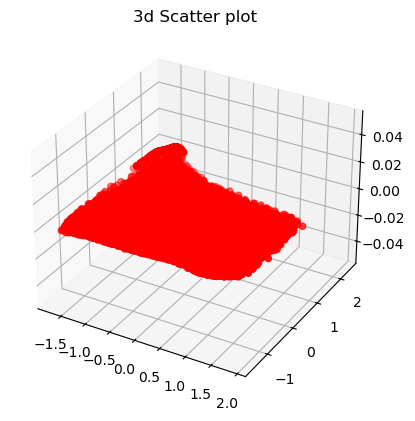

In [61]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(y_preds[:,0], y_preds[:,1], color = 'red')

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()
